<a href="https://colab.research.google.com/github/m3y54m/ut-nndl-course/blob/master/miniproj1_4_d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D 

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os

print(tf.VERSION)
print(tf.keras.__version__)

1.12.0
2.1.6-tf


In [0]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)

x_train shape: (50000, 32, 32, 3)


In [0]:
trainset_size = x_train.shape[0]
testset_size = x_test.shape[0]
batch_size = 100
steps_per_epoch = np.ceil(trainset_size / batch_size).astype('int')
num_classes = 10
epochs = 10
# input shape: (32, 32, 3)
input_shape = x_train.shape[1:]

data_augmentation = False
#num_predictions = 20

print(trainset_size, 'train samples')
print(testset_size, 'test samples')

50000 train samples
10000 test samples


In [0]:
# Convert class vectors to binary (one-hot) class matrices.
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Normalize input numbers
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [0]:
tf.keras.backend.clear_session()

model = Sequential()

model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

# Let's train the model using GradientDescentOptimizer
model.compile(optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

results_for_sgd = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    shuffle=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
__________

In [0]:
tf.keras.backend.clear_session()

model = Sequential()

model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

# Let's train the model using AdamOptimizer
model.compile(optimizer=tf.train.AdamOptimizer(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

results_for_adam = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    shuffle=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
__________

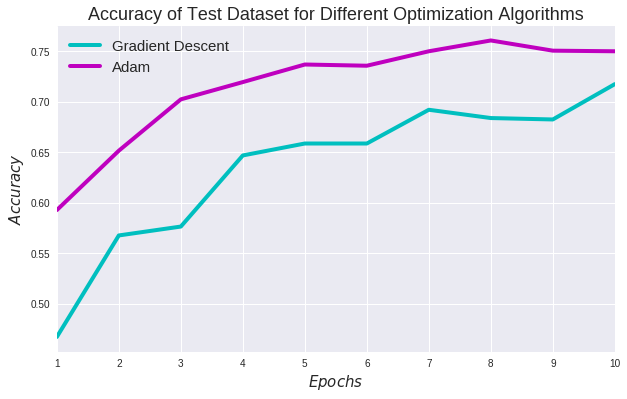

In [0]:
# Accuracy for Validation (Test) Dataset
plt_val_acc_sgd = results_for_sgd .history["val_acc"]
plt_val_acc_adam = results_for_adam.history["val_acc"]
num_epochs = len(plt_val_acc_sgd)
plt_epoch = np.arange(1, num_epochs+1, 1, dtype=int)
# Plot Accuracy
plt.figure(1, figsize=(10, 6))
plt.plot(plt_epoch, plt_val_acc_sgd, color='c', linewidth=4, label='Gradient Descent')
plt.plot(plt_epoch, plt_val_acc_adam, color='m', linewidth=4, label='Adam')
plt.xlim(1, num_epochs)
plt.xticks(plt_epoch)
plt.title('Accuracy of Test Dataset for Different Optimization Algorithms', fontsize=18)
plt.legend(loc='best', fontsize=15)
plt.xlabel(r'$Epochs$', fontsize=15)
plt.ylabel(r'$Accuracy$', fontsize=15)
plt.grid(True)
plt.show()